# Pymaceuticals Inc.
---

### Analysis

- Mice who were treated with Capomulin and Ramicane had a smaller average tumor volume compared to treatment that was using the other drugs. The tumor volume data for Capomulin and Ramicane also had the smallest, std dev and variance compared to tumor volumes for other drugs
- When we look at the box and whisker plot, we can see that the upper whiskers for Capomulin and Ramicane plots reach the lower whiskers for the other drug choices. We can also see that Capomulin and Ramicane have the smallest range for the tumor volume, which means we can infer that these drug's are the most effective out of the drugs tested.
- When we look at a specific mouse id (I used mouse y793) and how it is affected by Capomulin treatment, we can see that the tumor volume decreases as treatment continues, so we can see that this drug treatment is working as intended and is cause the tumor to decrease in volume
- When we look at the last chart Capomulin Regimen, Mouse Weight vs Average Tumor Volume, we can see that as weight increases, the average tumor volume should generally increase as well. This makes complete sense to me. Mice that weight more, would have tumor's that generally weight more since they are already larger. 
- Overall I would say Pymaceuticals drug of interest (Capomulin) is the most effective in treating SCC tumors
 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#print(mouse_metadata.columns)
#print(study_results.columns)
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "right")
combined_data = combined_data[['Mouse ID','Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                                'Sex', 'Age_months', 'Weight (g)']]

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0     b128    Capomulin          0                45.0                 0   
1     f932     Ketapril          0                45.0                 0   
2     g107     Ketapril          0                45.0                 0   
3     a457     Ketapril          0                45.0                 0   
4     c819     Ketapril          0                45.0                 0   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [59]:
# Checking the number of mice.
mice_num = len(combined_data["Mouse ID"].unique())
print(f"There are {mice_num} mice")

There are 249 mice


In [65]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
dupes


array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df = combined_data.loc[combined_data["Mouse ID"] == 'g989',:]
type(dupe_df)

pandas.core.frame.DataFrame

In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data[combined_data["Mouse ID"].isin(dupes) == False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = len(cleaned_df["Mouse ID"].value_counts())
cleaned_mice_num

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# grouped = (cleaned_df.groupby(['Drug Regimen', 'Tumor Volume (mm3)']))
# mean = grouped.mean()
# Was trying it this way but was not working, gonna have to dive deeper to figure out why
summary_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)
column_names_mapping = {
    'Mean': 'Mean_Tumor_Volume',
    'Median': 'Median_Tumor_Volume',
    'Variance': 'Tumor_Volume_Variance',
    'Std_Dev': 'Tumor_Volume_Std_Dev',
    'SEM': 'Tumor_Volume_SEM'
}
summary_df = summary_df.rename(columns= column_names_mapping)
print(summary_df)




              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_SE

In [200]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)
summary_df

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Bar and Pie Charts

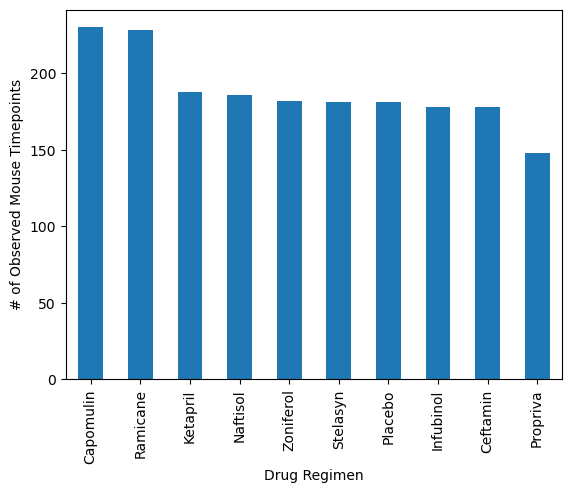

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice = cleaned_df["Drug Regimen"].value_counts()
bar = mice.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

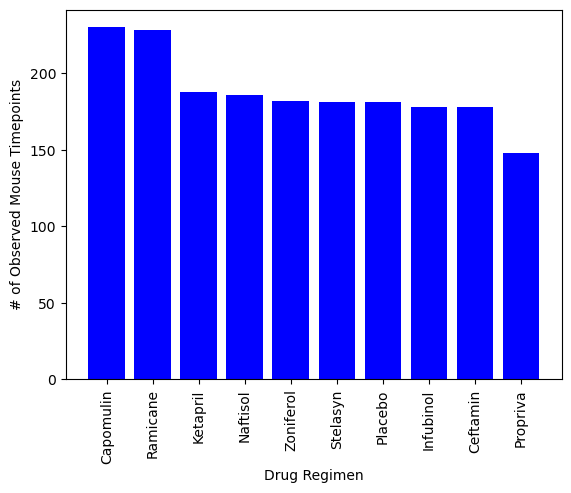

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice.index.values
y_axis = mice.values
plt.bar(x_axis, y_axis, color = 'blue', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

Text(0, 0.5, 'Sex')

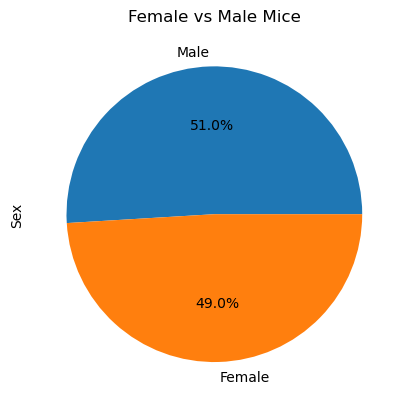

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df["Sex"].value_counts()
p_pie = gender_counts.plot(kind='pie', autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.ylabel("Sex")

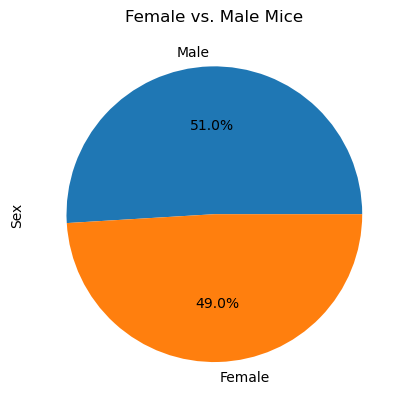

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [51, 49]
plot = gender_counts.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#clean up the df to make it easier for me
cleaner_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | 
                                    (cleaned_df["Drug Regimen"] == "Ramicane") |
                                    (cleaned_df["Drug Regimen"] == "Infubinol") |
                                    (cleaned_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]        
                                ]
mice_df = cleaner_df.groupby(cleaner_df["Mouse ID"])["Timepoint"].max()
treatment_df = pd.merge(cleaner_df, mice_df, on=('Mouse ID', 'Timepoint'), how='right')
treatment_df.reset_index(drop=True)
treatment_df


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
0,a203,Infubinol,45,67.973419,23
1,a251,Infubinol,45,65.525743,25
2,a275,Ceftamin,45,62.999356,28
3,a411,Ramicane,45,38.407618,22
4,a444,Ramicane,45,43.047543,25
...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,27
96,y793,Capomulin,45,31.896238,17
97,y865,Ceftamin,45,64.729837,26
98,z578,Ramicane,45,30.638696,16


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_data = treatment_df.loc[treatment_df["Drug Regimen"] == drug]
    tumor_vol_data.append(drug_data["Tumor Volume (mm3)"])
    #add subset 
    #The subset was adding since I merged using a right merge
    #Determine outliers using upper and lower bounds
    quartiles = drug_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = round(lowerq - (1.5 * iqr), 3)
    upper_bound = round(upperq + (1.5 * iqr), 3)
    #Find data that could be potential outliers
    potential_outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] >= upper_bound) | (drug_data["Tumor Volume (mm3)"] <= lower_bound)]
    potential_outliers_val = potential_outliers["Tumor Volume (mm3)"]
    print(f"{drug} has lower bound of {lower_bound} and an upper bound of {upper_bound}")
    print(f"{drug}'s potential outliers are: {potential_outliers_val}")
#this one was tricky but finally got it working after fixing formatting and testing.
#turned out my some of my syntax and setup had to be changed.




    

Capomulin has lower bound of 20.705 and an upper bound of 51.832
Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has lower bound of 17.913 and an upper bound of 54.307
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has lower bound of 36.833 and an upper bound of 82.741
Infubinol's potential outliers are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has lower bound of 25.355 and an upper bound of 87.666
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


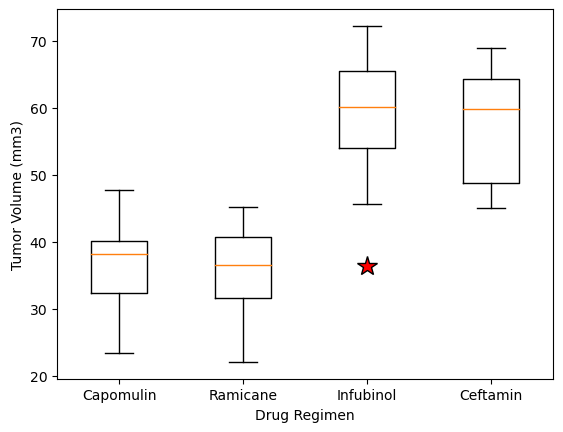

In [205]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
whisker = ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker = '*', markersize = 15, markerfacecolor = 'red'))
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

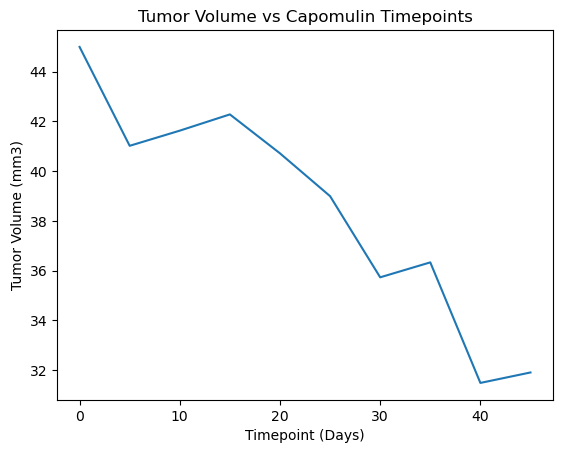

In [219]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#The example uses mouse id l509, but I used y793
#To do this with a different id, I would just replace
#The "Mouse ID" with whatever id I want to check
mice_id = list(cleaner_df.loc[cleaner_df["Mouse ID"] =='y793'])
capo_mouse_id_df = cleaner_df.loc[(cleaner_df["Drug Regimen"] == 'Capomulin') & (cleaner_df["Mouse ID"] == 'y793')]
capo_mouse_id_df[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]].reset_index(drop= True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(capo_mouse_id_df["Timepoint"], capo_mouse_id_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Capomulin Timepoints")
plt.show()


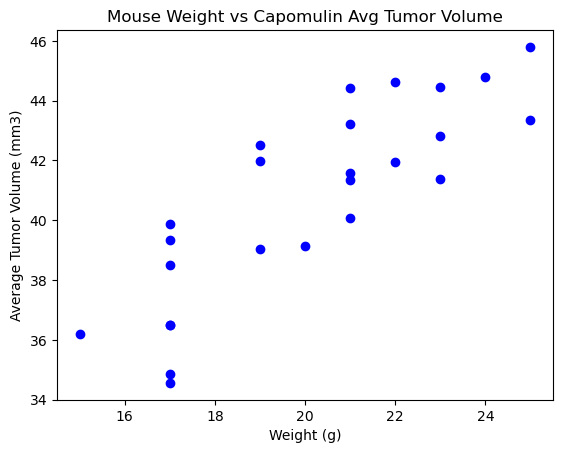

In [220]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaner_df.loc[(cleaner_df["Drug Regimen"] == "Capomulin"), :]
cap_data_for_mean = capomulin_data.iloc[:, [0] + list(range(2, len(capomulin_data.columns)))]
#print(cap_data_for_mean)
avg_mouse_weight = cap_data_for_mean.groupby(["Mouse ID"]).mean()
#Had to add weight back to the cleaner df to access the data here
plt.scatter(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Capomulin Avg Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


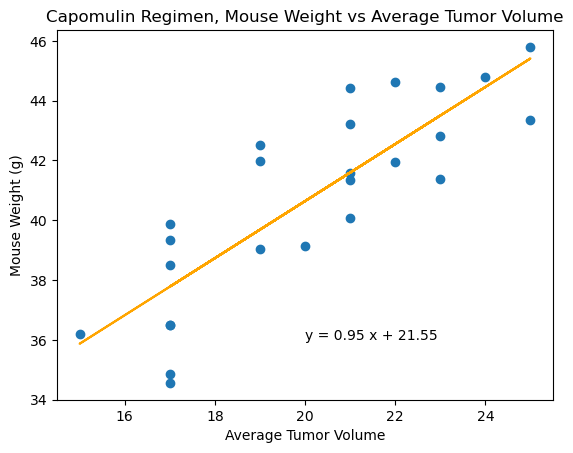

In [221]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(avg_mouse_weight['Weight (g)'],avg_mouse_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
regress_values=avg_mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r-squared is: {round(rvalue**2, 2)}")
plt.scatter(avg_mouse_weight["Weight (g)"],avg_mouse_weight["Tumor Volume (mm3)"])
plt.plot(avg_mouse_weight["Weight (g)"], regress_values, color='orange')
plt.annotate(line_eq,(20,36), fontsize=10)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight (g)")
plt.title("Capomulin Regimen, Mouse Weight vs Average Tumor Volume")
plt.show()